### Description:
This program uses the Uber Customer Reviews dataset (12,000+ reviews) from the Google Play Store to perform sentiment analysis. 
It applies two optimization techniques—Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent—to train a neural network for predicting review scores. The program then compares the performance of both techniques using Mean Squared Error (MSE) and visualizes the training loss curves.

- By: Jharana Adhikari and Yasaswin Palukuri

#### Steps:
- Step 1: Install necessary libraries (tensorflow, scikit-learn, matplotlib) for data handling, model building, and visualization.
- Step 2: Import required libraries for data preprocessing, model building, and evaluation (such as pandas, numpy, tensorflow).
- Step 3: Load the Uber customer reviews dataset, clean the data, and preprocess it. This includes:
      - Encoding categorical text data (e.g., reviews) using techniques like LabelEncoder or TF-IDF.
      - Handling missing values and preparing features (e.g., review content, user ratings).
- Step 4: Split the data into features (e.g., text data or numeric values) and target (e.g., ratings or sentiment labels).
- Step 5: Split the data into training and testing sets using train_test_split (80% for training and 20% for testing).
- Step 6: Build a neural network model using TensorFlow/Keras, with layers like:
   - Input Layer (depending on the number of features),
   - Hidden Layers (e.g., using ReLU activation),
   - Output Layer (for regression tasks, use a linear activation function).
- Step 7: Compile and train the model using Stochastic Gradient Descent (SGD) with a batch size of 1.
- Step 8: Compile and train the model using Mini-Batch Gradient Descent with a batch size of 32.
- Step 9: Evaluate both models' performances using Mean Squared Error (MSE) to assess how well each optimization technique predicts the reviews' ratings.
- Step 10: Visualize and compare the training loss curves for both SGD and Mini-Batch Gradient Descent to understand the learning dynamics of both techniques.

In [74]:
# import labraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [76]:
# Load the dataset (Assuming it is a CSV file, replace with the correct path)
data = pd.read_csv("uber_reviews_without_reviewid.csv")


In [78]:
# Encoding 'content' column
encoder = LabelEncoder()
df['content'] = encoder.fit_transform(df['content'])

# Preview the data
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,2021,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,4074,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,6597,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,2021,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,7651,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


In [80]:
# Features and target
X = df[['content', 'thumbsUpCount']]  # Features
y = df['score']  # Target variable



In [82]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Preview the training set
X_train.head(), y_train.head()

(       content  thumbsUpCount
 9182      5996              0
 11091      248              0
 6428      2465              0
 288       1657              0
 2626       290              0,
 9182     5
 11091    5
 6428     5
 288      5
 2626     5
 Name: score, dtype: int64)

In [86]:
# Build a Neural Network Model
model = Sequential()


In [88]:

# Input Layer
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 10 neurons
model.add(Dense(5, activation='relu'))  # Another hidden layer with 5 neurons



C:\Users\yoga1st\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
# Output Layer (regression task)
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
# Compile the model with SGD optimizer for Stochastic Gradient Descent
sgd_optimizer = SGD(learning_rate=0.01)

# Compile the model using SGD optimizer
model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')

# Train the model with SGD
history_sgd = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 2.8622
Epoch 2/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 2.8161
Epoch 3/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 2.7769
Epoch 4/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2.7927
Epoch 5/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2.7537
Epoch 6/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 2.7728
Epoch 7/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 2.7922
Epoch 8/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 2.7619
Epoch 9/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 2.7967
Epoch 10/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 2.7868
Epoch 11/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 2.8784
Epoch 12/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2.8466
Epoch 13/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 2.8592
Epoch 14/50
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 2.8326
Epoch 15/50
960

In [95]:
# Compile the model with SGD optimizer for Mini-Batch Gradient Descent
mini_batch_optimizer = SGD(learning_rate=0.01)

# Compile the model using Mini-Batch Gradient Descent optimizer
model.compile(optimizer=mini_batch_optimizer, loss='mean_squared_error')

# Train the model with Mini-Batch Gradient Descent
history_mini_batch = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7968
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8230
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7821
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8179
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7983
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7855
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8062
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8225
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7294
Epoch 10/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7478
Epoch 11/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7950
Epoch 12/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7794
Epoch 13/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7840
Epoch 14/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8222
Epoch 15/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0

In [96]:
# Evaluate the model using SGD
y_pred_sgd = model.predict(X_test)
sgd_mse = mean_squared_error(y_test, y_pred_sgd)
print("SGD Mean Squared Error: ", sgd_mse)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
SGD Mean Squared Error:  2.6442410468856665


In [104]:
# Evaluate the model using Mini-Batch Gradient Descent
y_pred_mini_batch = model.predict(X_test)
mini_batch_mse = mean_squared_error(y_test, y_pred_mini_batch)
print("Mini-Batch Gradient Descent Mean Squared Error: ", mini_batch_mse)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mini-Batch Gradient Descent Mean Squared Error:  2.6442410468856665


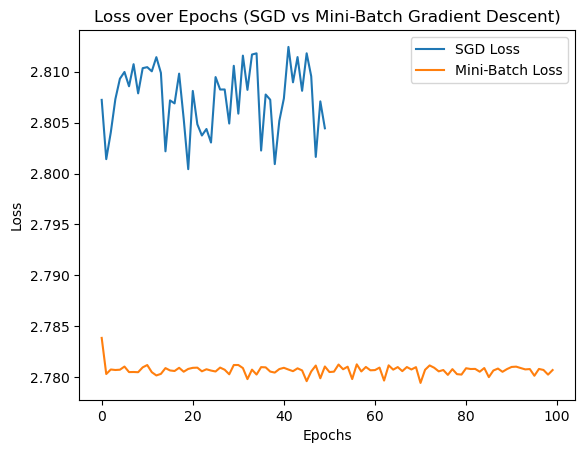

In [108]:
# Plotting the training history for SGD
plt.plot(history_sgd.history['loss'], label='SGD Loss')

# Plotting the training history for Mini-Batch Gradient Descent
plt.plot(history_mini_batch.history['loss'], label='Mini-Batch Loss')

plt.title('Loss over Epochs (SGD vs Mini-Batch Gradient Descent)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


- The Mean Squared Error (MSE) for both SGD and Mini-Batch Gradient Descent is the same: 2.6442410468856665. However, Mini-Batch converges more smoothly, while SGD shows instability due to its noisy updates.